In [1]:
import json;
import pandas as pd;
import scipy;
from scipy import stats;
# from apyori import apriori;
import matplotlib.pyplot as plt;
import numpy as np;
import sklearn
from sklearn.datasets import load_iris
from sklearn import tree

    
data_path = 'okcupid-profiles-clean-signs.csv'
df = pd.read_csv(data_path)

df = df[df['status'] != 'unknown']
help_dict = {}
help_df = df['sign']
sign_dict = {'aries': 1, 'taurus': 2, 'gemini': 3, 'cancer': 4, 'leo': 5, 'virgo': 6, 'libra': 7, 'scorpio': 8, 'sagittarius': 9, 'capricorn': 10, 'aquarius': 11, 'pisces': 12 }
for i in range(df.shape[0]):
    sign_entry = help_df.iloc[i]
    if sign_entry not in help_dict:
        for sign in sign_dict:
            if sign in sign_entry: 
                help_dict[sign_entry] = sign_dict[sign]

for key in help_dict:
    df.loc[ df['sign'] == key, 'sign'] = help_dict[key]

for i in range(df.shape[0]):
    if type(df['sign'].iloc[i]) == "<class 'str'>": 
        print(df['sign'].iloc[i])
df = pd.get_dummies(data=df[['age', 'status', 'sign', 'height']], columns=['status'])

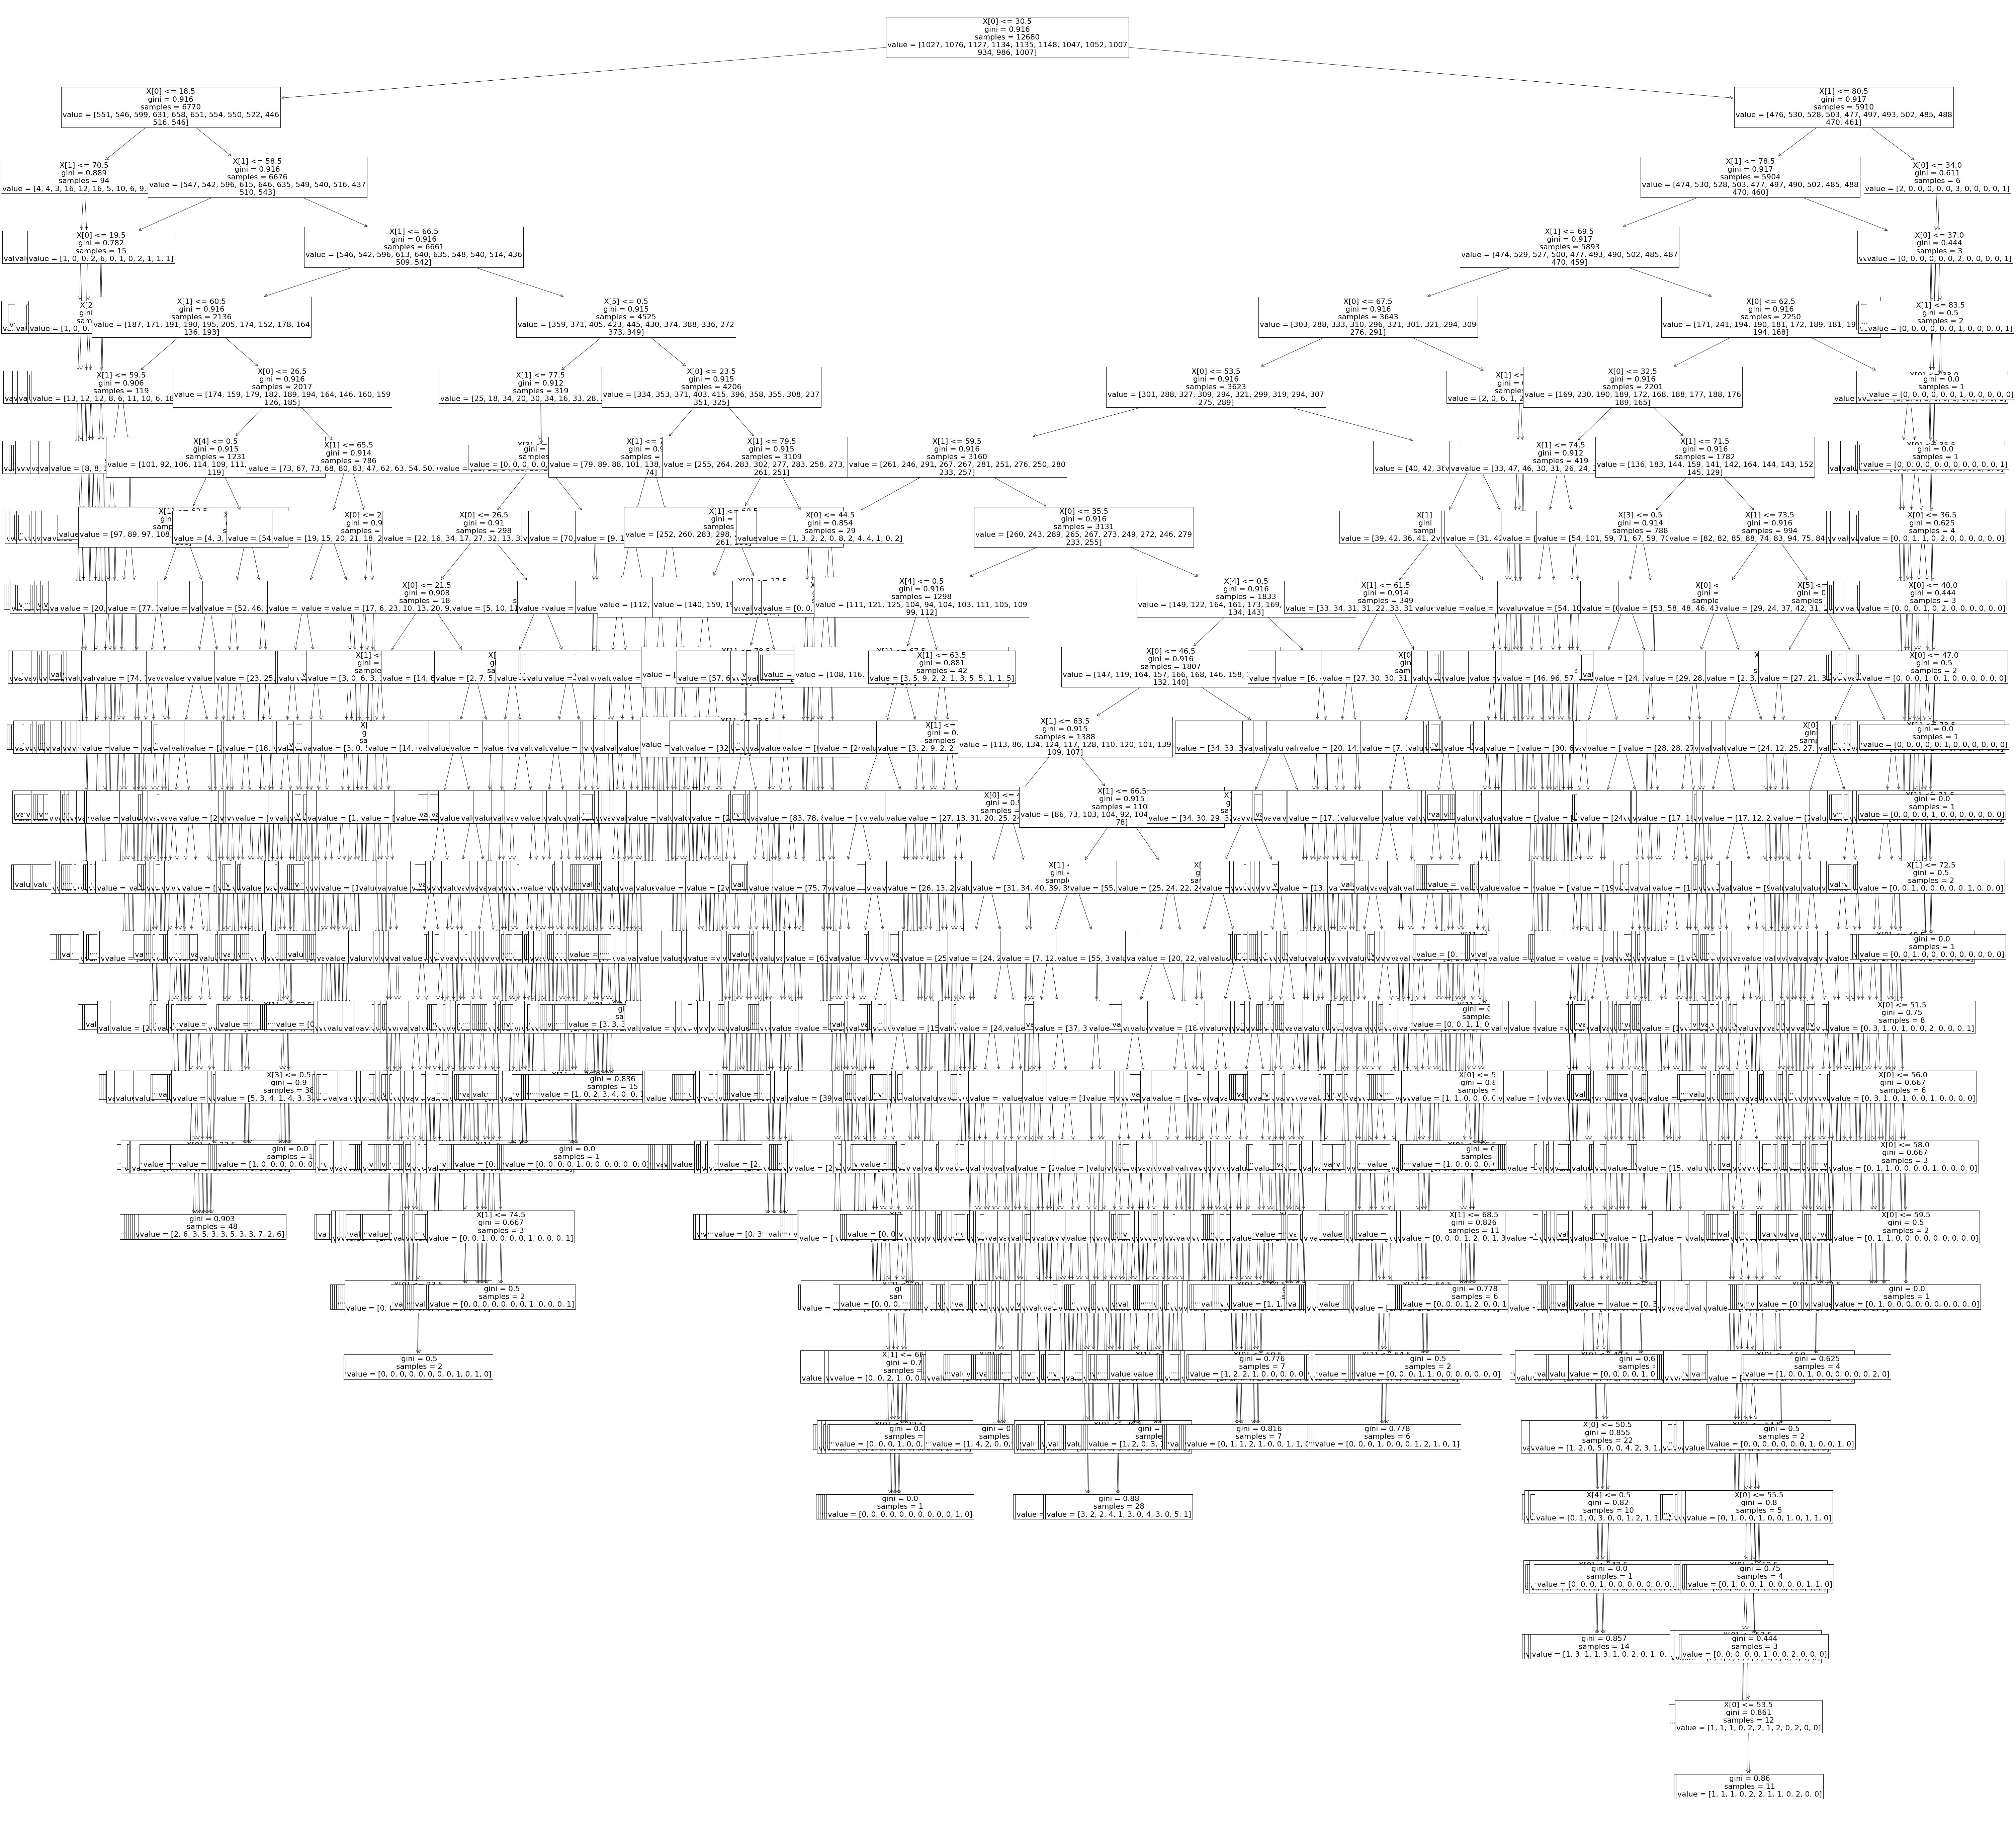

In [2]:
features0 = df.loc[:, df.columns!='sign'].to_numpy()
features, test_data = features0.copy()[0:12680], features0.copy()[12681:]

target0 = df[["sign"]].to_numpy()
target0 = target0.astype('int')

target, goals = target0.copy()[0:12680], target0.copy()[12681:]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, target)

plt.figure(figsize=(100,100))
tree.plot_tree(clf, fontsize=22)
plt.savefig('tree_high_dpi', dpi=100)


In [3]:
def accuracy(preds, targets):
    acc = 0
    for i in range(preds.shape[0]):
        if preds[i] == targets[i]:
            acc +=1
    return acc/preds.shape[0]

predictions = clf.predict(test_data)
print(accuracy(predictions, goals))
    

0.08124373119358075
